In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline  
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./data/', one_hot = True)
training_img = mnist.train.images
training_lab = mnist.train.labels
test_img = mnist.test.images
test_lab = mnist.test.labels

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [5]:
# MLP Model

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W_1 = tf.Variable(tf.random_normal([784, 128]))
b_1 = tf.Variable(tf.zeros([128]))

z_1 = tf.matmul(x, W_1) + b_1
a_1 = tf.nn.sigmoid(z_1)

W_2 = tf.Variable(tf.random_normal([128, 32]))
b_2 = tf.Variable(tf.zeros([32]))

z_2 = tf.matmul(a_1, W_2) + b_2
a_2 = tf.nn.sigmoid(z_2)

W_3 = tf.Variable(tf.random_normal([32, 10]))
b_3 = tf.Variable(tf.zeros([10]))

z_3 = tf.matmul(a_2, W_3) + b_3
a_3 = tf.nn.softmax(z_3)

cross_entropy = - tf.reduce_sum(y * tf.log(tf.maximum(a_3, 1e-15)), reduction_indices=1)
cost = tf.reduce_mean(cross_entropy)

# softmax_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = y , logits = z_3)
# cost = tf.reduce_mean(softmax_cross_entropy) 


optimization = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost) 

# https://www.tensorflow.org/versions/r0.12/api_docs/python/train/optimizers
# tf.train.GradientDescentOptimizer
# tf.train.AdadeltaOptimizer
# tf.train.AdagradOptimizer
# tf.train.MomentumOptimizer
# tf.train.AdamOptimizer
# tf.train.RMSPropOptimizer

# http://ruder.io/optimizing-gradient-descent/

correct_prediction = tf.equal(tf.argmax(a_3, 1), tf.argmax(y, 1))    
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:
# Training

training_epochs = 200
display_step    = 10
batch_size = 100

# init = tf.global_variables_initializer()
# sess = tf.Session()
# sess.run(init)

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples/batch_size)
   
    for iteration in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimization, feed_dict={x: batch_xs, y: batch_ys})
   
    if (epoch) % display_step == 0:
        
        # training set accuracy     
        feed_training = {x: training_img, y: training_lab}
        train_acc = sess.run(accuracy, feed_dict=feed_training)
        print ("TRAIN ACCURACY: %.3f" % (train_acc))
        
        # test set accuracy
        feed_test = {x: test_img, y: test_lab}
        pred, test_corr, test_acc = sess.run([tf.argmax(a_3, 1), correct_prediction, accuracy], feed_dict=feed_test)
        print ("TEST ACCURACY: %.3f" % (test_acc))

print("Finished")

TRAIN ACCURACY: 0.998
TEST ACCURACY: 0.946
TRAIN ACCURACY: 0.999
TEST ACCURACY: 0.946
TRAIN ACCURACY: 0.999
TEST ACCURACY: 0.946
TRAIN ACCURACY: 0.999
TEST ACCURACY: 0.946
TRAIN ACCURACY: 0.999
TEST ACCURACY: 0.946
TRAIN ACCURACY: 0.999
TEST ACCURACY: 0.947
TRAIN ACCURACY: 0.999
TEST ACCURACY: 0.947
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.946
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.946
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.946
Finished


In [10]:
def image_show(*args):
    

    images = {}
    pred_labels = {}
    target_labels = {}
    if len(args)<5:
        print("5 이상의 숫자를 입력해주세요.")
    else:
        fig, axes = plt.subplots(len(args)//5+1, 5,  figsize = (30, 6*len(args)//5+1))
        len(args)
   
        for k in range(5-(len(args)%5)):
            fig.delaxes(axes[len(args)//5][4-k])

        i = 0
        for i in args:
            images[i] = np.reshape(test_img[np.where(test_corr==False)[0][i]],(28,28))
            pred_labels[i] = pred[np.where(test_corr==False)[0][i]]
            target_labels[i] = test_lab[np.where(test_corr==False)[0][i]]
            axes[args.index(i)//5, args.index(i)%5].set_title("Target : {}".format(np.argmax(target_labels[i])) +
                                      "\nPrediction : {}".format(pred_labels[i] ),  fontsize=30)    
            axes[args.index(i)//5, args.index(i)%5].imshow(images[i], cmap=plt.get_cmap('gray'))
            fig.tight_layout()
            axes[args.index(i)//5, args.index(i)%5].set_aspect('equal')        
            i += 1  
        plt.show()
    
def false_img(num):
     random_num = np.random.choice(len(np.where(test_corr==False)[0]), size=num)
     image_show(*random_num)     

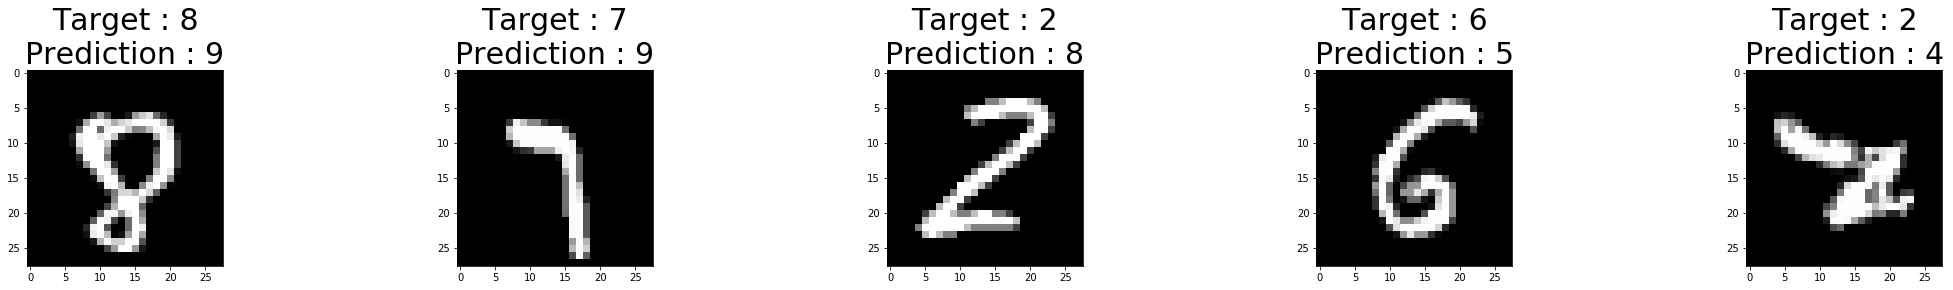

In [11]:
false_img(5)